### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
### Draw the inferences from the clusters obtained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import openpyxl

# Load the workbook
workbook = openpyxl.load_workbook('EastWestAirlines.xlsx')

# Select the worksheet
worksheet = workbook['data']

# Read the contents of the worksheet into a list of lists
data = []
for row in worksheet.iter_rows(values_only=True):
    data.append(row)

# Convert the list of lists to a DataFrame object and set the column names
df = pd.DataFrame(data[1:], columns=data[0])


In [3]:
df.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [4]:
# Column rename.

df= df.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [5]:
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

df_new =  df.drop(['ID','Award'], axis=1)
df_new.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [6]:
df_new.shape

(3999, 10)

In [7]:
df_new.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [8]:
# Checking datatypes
df_new.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
dtype: object

In [9]:
# Checking dupliacte values
df_new[df_new.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
3876,1000,0,1,1,1,0,0,0,0,1597


In [10]:
df_new = df_new.drop_duplicates(subset=None, keep='first', inplace=False)

In [11]:
# Checking dupliacte values
df_new[df_new.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll


In [12]:
# Finding Missing Values
df_new[df_new.isnull().any(axis=1)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll


### Using Box Plot to detect the outliers

Indices of outliers from the box plots:
[2049, 4, 8, 9, 2058, 11, 20, 21, 2070, 2069, 24, 22, 26, 32, 2082, 35, 36, 2086, 2087, 42, 43, 45, 2093, 2094, 49, 50, 2098, 2105, 57, 59, 63, 2112, 65, 2113, 68, 70, 71, 72, 73, 2122, 79, 81, 2130, 2131, 2132, 85, 2133, 87, 2136, 90, 2139, 2140, 91, 2142, 94, 93, 2145, 100, 2149, 103, 2151, 105, 106, 2153, 109, 111, 112, 2161, 114, 2162, 117, 2166, 2168, 121, 2169, 122, 2172, 125, 126, 127, 2175, 2177, 2173, 2174, 2180, 2181, 133, 135, 2176, 2179, 2182, 2187, 137, 145, 2193, 147, 150, 151, 152, 2200, 2199, 155, 156, 2203, 158, 161, 162, 2209, 2214, 167, 168, 2217, 170, 2218, 172, 173, 175, 177, 2225, 179, 181, 2230, 186, 187, 188, 190, 191, 192, 193, 196, 198, 2249, 201, 2251, 2252, 203, 206, 207, 2250, 2254, 210, 212, 214, 2263, 2267, 220, 221, 226, 2276, 2277, 2278, 229, 2283, 2284, 237, 238, 2288, 240, 242, 243, 244, 245, 246, 2295, 248, 2289, 2290, 2293, 252, 2301, 255, 256, 259, 2310, 263, 264, 268, 2317, 269, 271, 272, 273, 275, 281, 282,

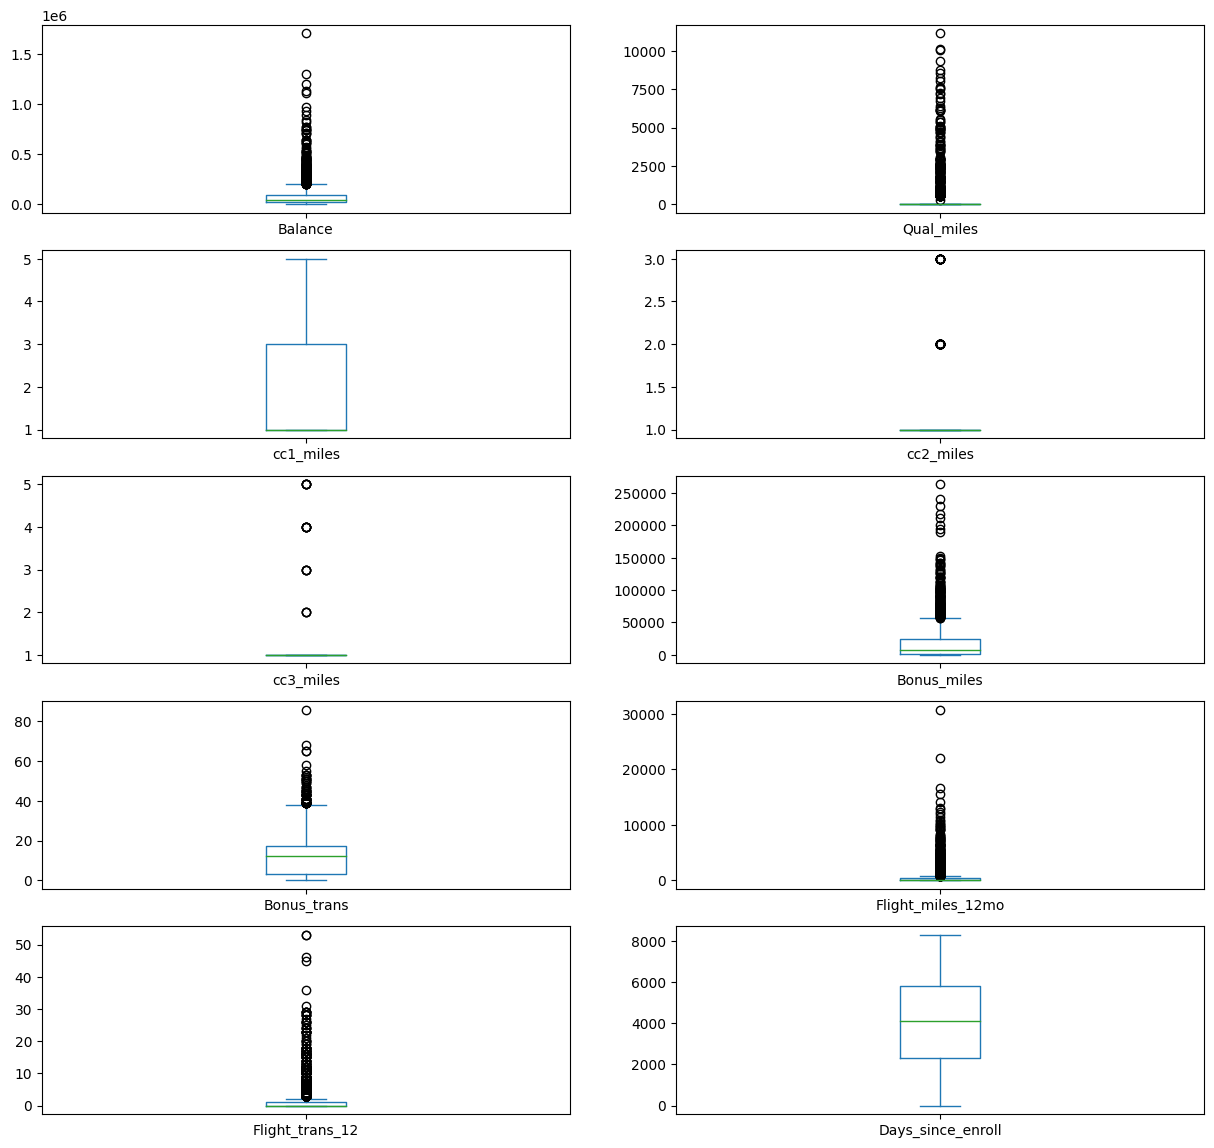

In [13]:
# Box plot find the outliers 

box_plot = df_new.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(df_new.columns, box_plot):
    outliers = ((df_new[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (df_new[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = df_new.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

### Even though there are certain datapoints which are outliers but all of the data are in the resonable range. Hence no treatment is required. 

In [14]:
# Correlation matrix to check the multi collinearity of the features
df_new.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000


<AxesSubplot: >

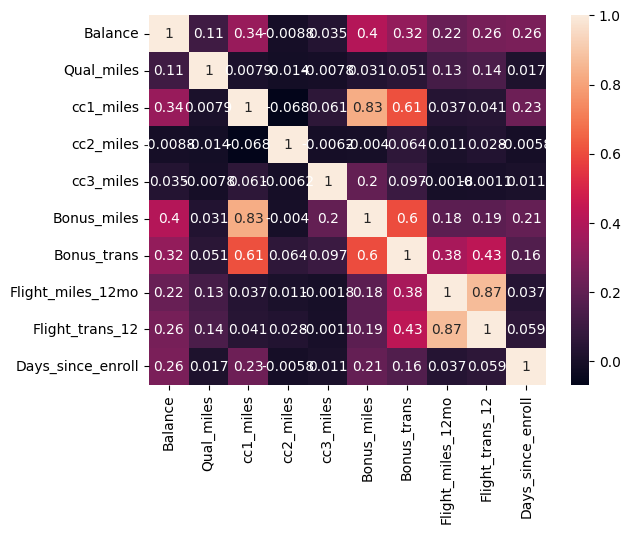

In [15]:
# Heatmaps for the given dataset.
sns.heatmap(df_new.corr(), annot=True)

### None of the values is near or equal to 1 or -1. Hence no multicolinearity present.


In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(df_new)  
print("VIF Results:")
print(vif_results)

VIF Results:
             feature        VIF
0            Balance   2.004740
1         Qual_miles   1.063352
2          cc1_miles  11.517366
3          cc2_miles  21.084321
4          cc3_miles  19.126566
5        Bonus_miles   5.163918
6        Bonus_trans   5.439811
7  Flight_miles_12mo   4.559922
8    Flight_trans_12   5.137903
9  Days_since_enroll   5.331299


### VIF value for all the features is very low. Hence all the variables are significant and there is no presence of multicollinearity.
### From both the correlation matrix and the VIF value show that none of the feature depend on each other. Hence there is no multicollinearity present in the dataset.

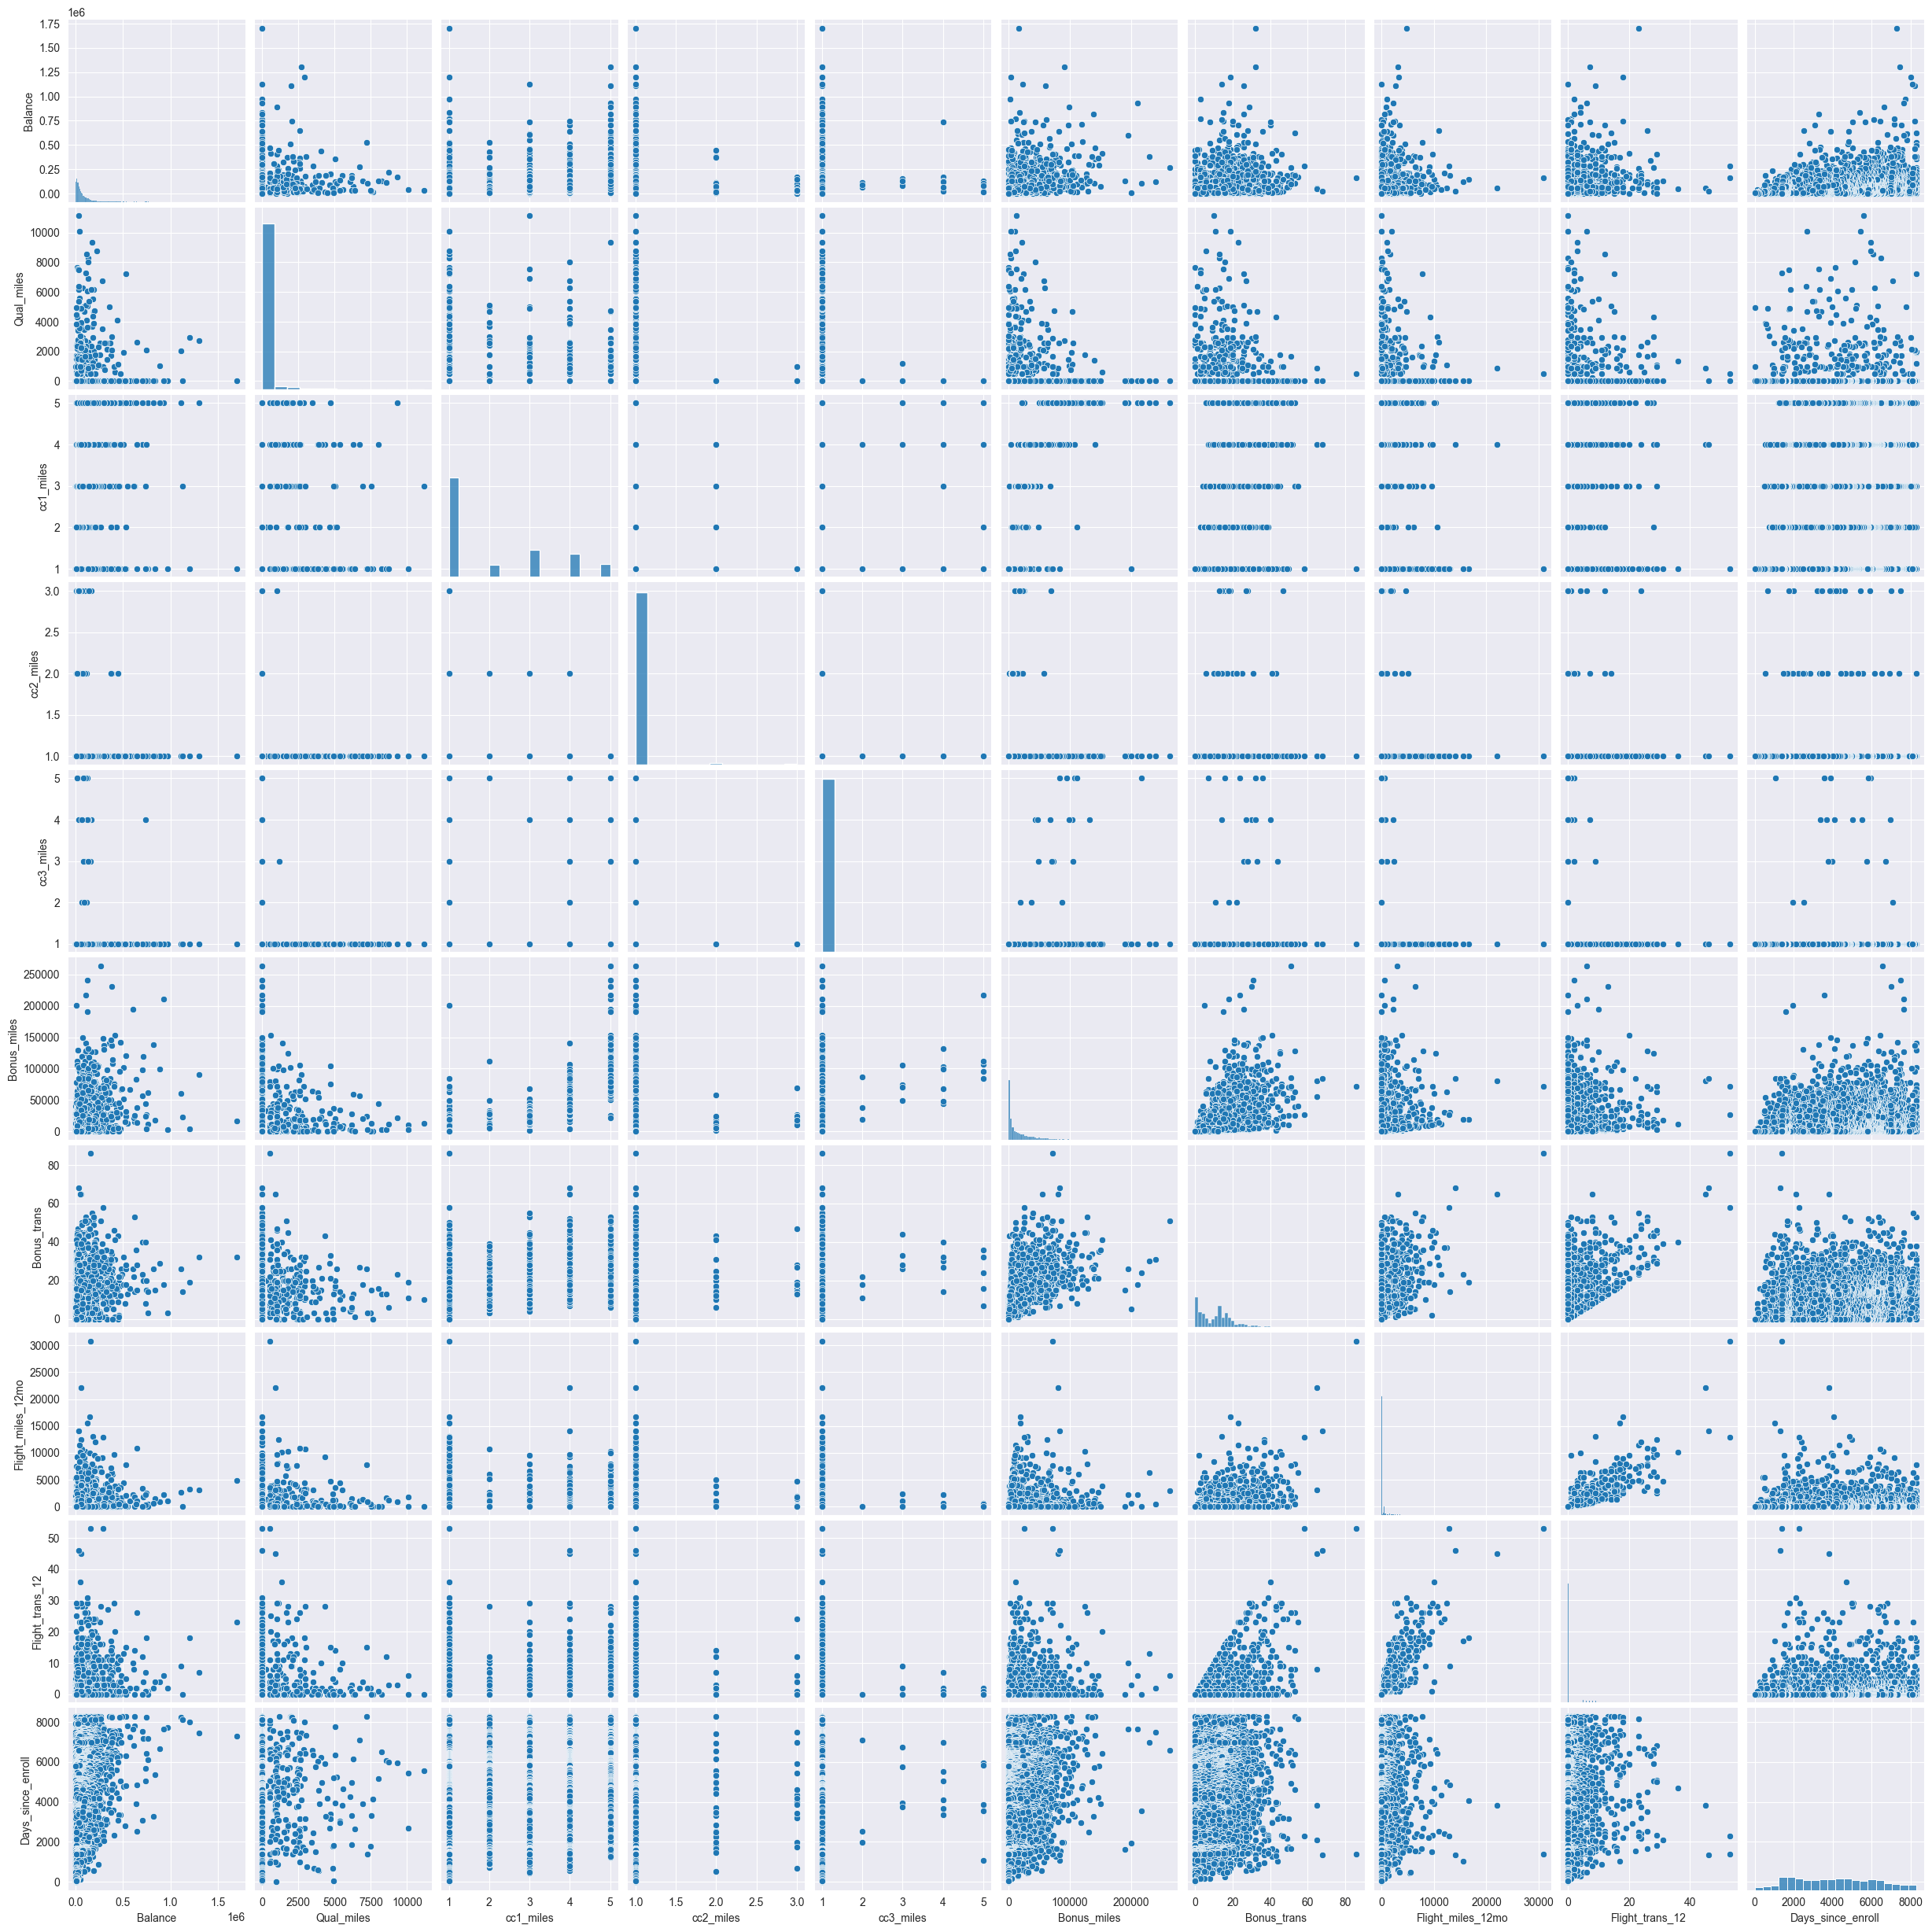

In [17]:
# Drawing Histogram to check the distribution of the data.
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df_new)

### Most of the histogram shows that features are not normally distributed.

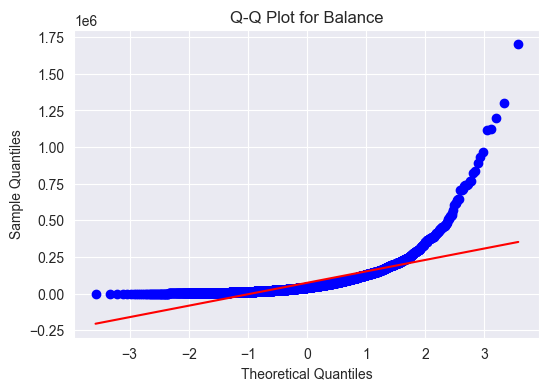

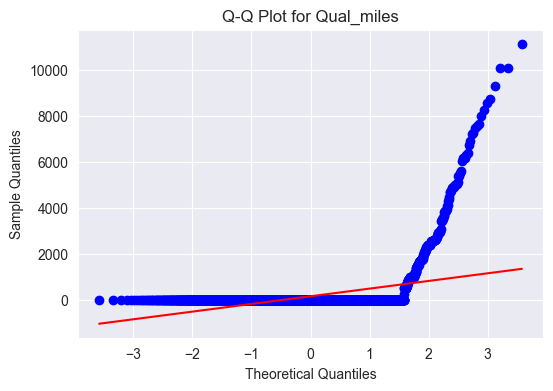

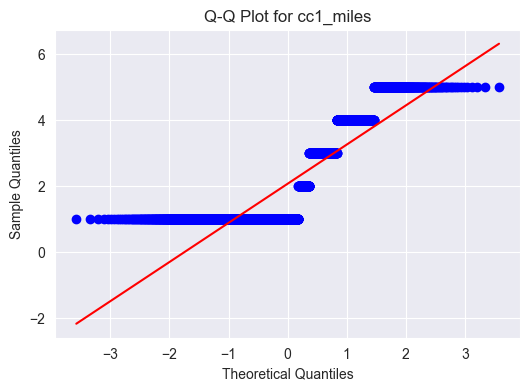

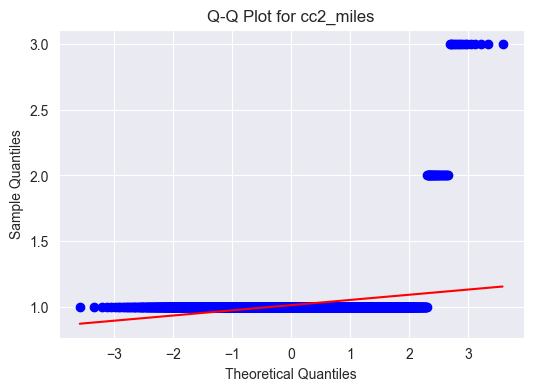

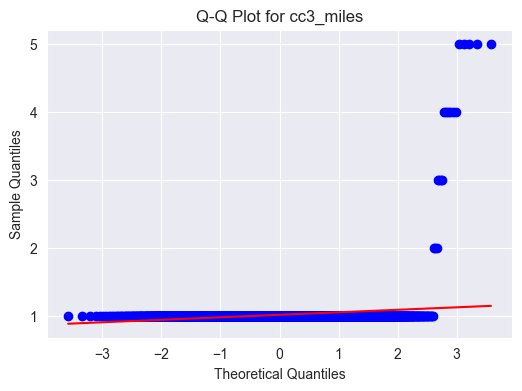

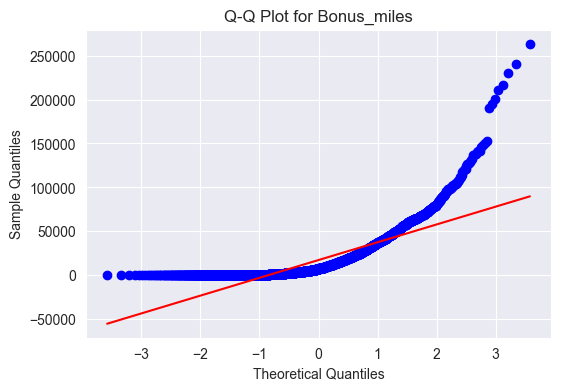

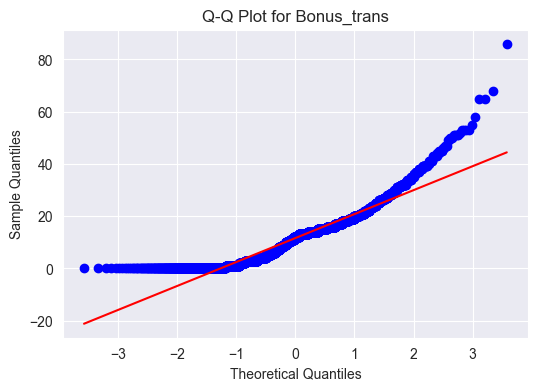

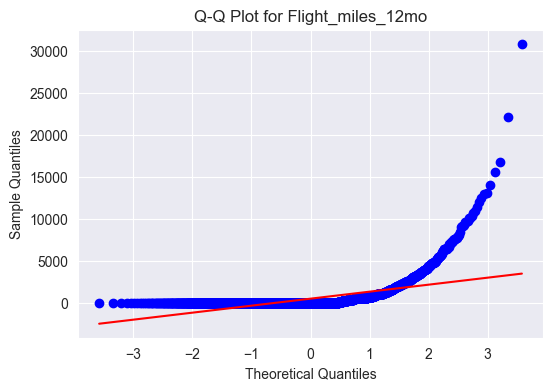

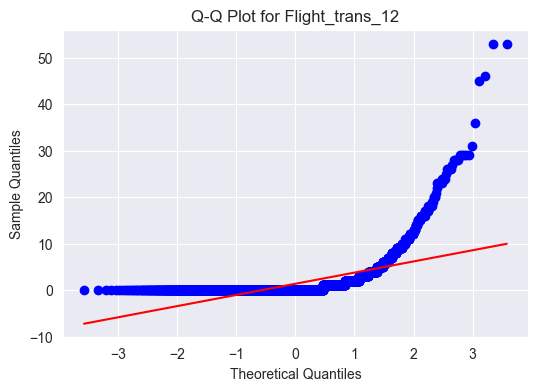

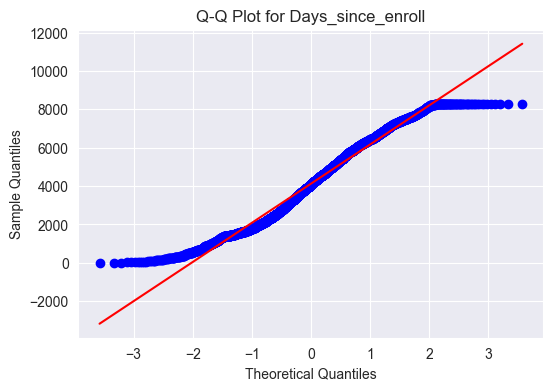

In [19]:
# Using Q-Q plot for checking the data distribution
# Create Q-Q plots for each variable in separate graphs
for col in df_new.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(df_new[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

### Most of the Q-Q plot shows that each of the feature is not normally distributed.
### Hence we can use Normalization for transformation.

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_df = scaler.fit_transform(df_new)

print(norm_df)

[[0.01650773 0.         0.         ... 0.         0.         0.84374246]
 [0.01128788 0.         0.         ... 0.         0.         0.83988425]
 [0.02425685 0.         0.         ... 0.         0.         0.84784181]
 ...
 [0.0431695  0.         0.5        ... 0.         0.         0.16879672]
 [0.03220189 0.         0.         ... 0.01622481 0.01886792 0.16867615]
 [0.00176908 0.         0.         ... 0.         0.         0.16831444]]


# K-means clustering

### To choose the optimum cluster we use elbow method. 

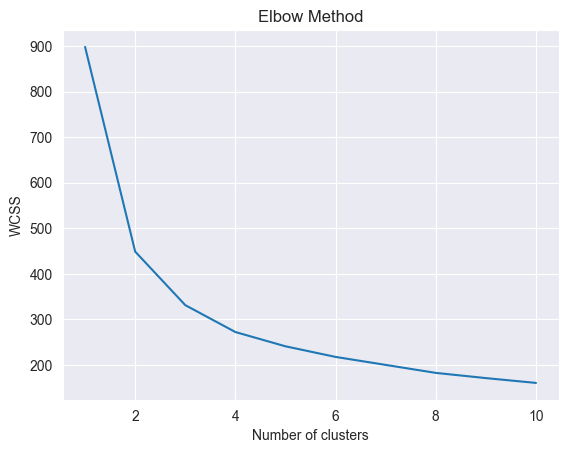

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(norm_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### After the 4 clusters the slope is almost constant. Hence 5 is optimum cluster value.

### Building cluster model

In [37]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(norm_df)

KMeans(n_clusters=4, random_state=42)

In [38]:
clusters_new.labels_

array([3, 3, 3, ..., 2, 0, 0])

In [39]:
#Assign clusters to the data set
df_new['clusterid_new'] = clusters_new.labels_

In [40]:
#these are standardized values.
clusters_new.cluster_centers_

array([[2.36888442e-02, 1.09866374e-02, 2.38095238e-02, 1.10163468e-02,
        1.24378109e-03, 1.69334658e-02, 8.35771310e-02, 1.28528870e-02,
        2.19656435e-02, 2.65366303e-01],
       [8.05148873e-02, 1.47645960e-02, 7.54016064e-01, 6.69344043e-04,
        8.70147256e-03, 1.78146423e-01, 2.29024626e-01, 1.93540058e-02,
        3.36692683e-02, 7.44146427e-01],
       [5.01832357e-02, 1.09262286e-02, 6.25920471e-01, 7.36377025e-04,
        3.31369661e-03, 1.18174302e-01, 2.09953077e-01, 1.28867533e-02,
        2.18412204e-02, 3.63597299e-01],
       [3.87082781e-02, 1.52707004e-02, 3.21888412e-02, 1.07296137e-02,
        1.50214592e-03, 1.96348371e-02, 9.29234455e-02, 1.58009047e-02,
        2.81156369e-02, 6.93991623e-01]])

In [41]:
df_new.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,40385.641791,122.479033,1.095238,1.022033,1.004975,4465.100924,7.187633,396.087420,1.164179,2202.948117
1,1,137264.839357,164.595716,4.016064,1.001339,1.034806,46974.539491,19.696118,596.432396,1.784471,6173.950469
2,2,85554.287187,121.805596,3.503682,1.001473,1.013255,31160.790869,18.055965,397.131075,1.157585,3017.675994
3,3,65991.343348,170.237768,1.128755,1.021459,1.006009,5177.412017,7.991416,486.936481,1.490129,5757.966524


In [42]:
df_new.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,3
1,19244,0,1,1,1,215,2,0,0,6968,3
2,41354,0,1,1,1,4123,4,0,0,7034,3
3,14776,0,1,1,1,500,1,0,0,6952,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1


# Hierarchical clustering

In [30]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

### Drawing dendrogram for each linkage to find the optimum number of clusters

### Dendrogram of single linkage

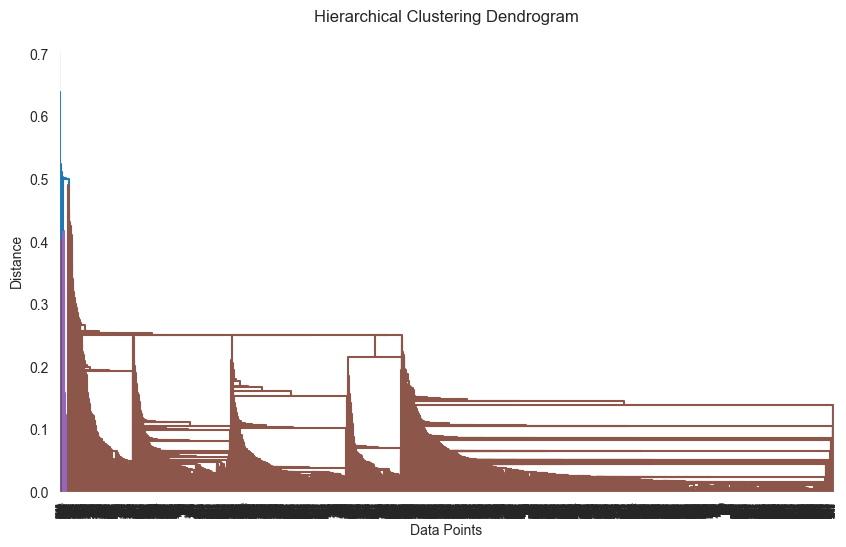

In [31]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(norm_df, method='single'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of complete linkage

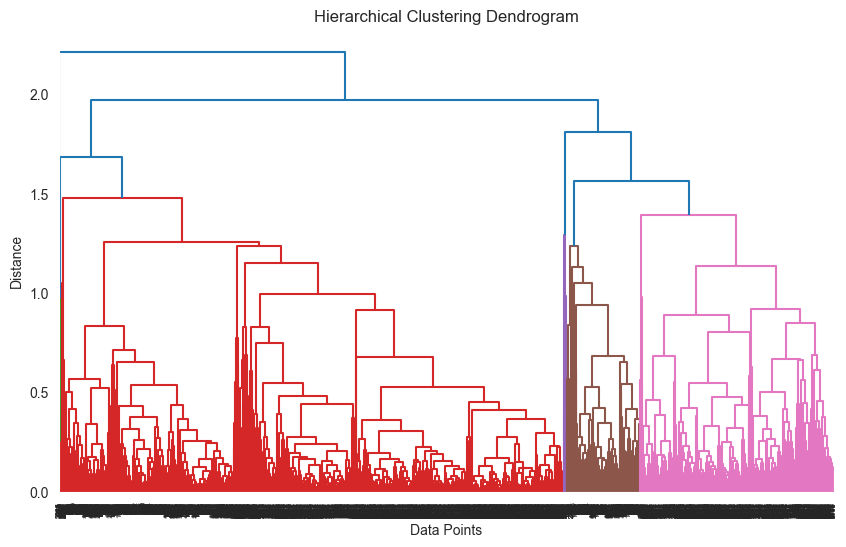

In [32]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(norm_df, method='complete'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of average linkage

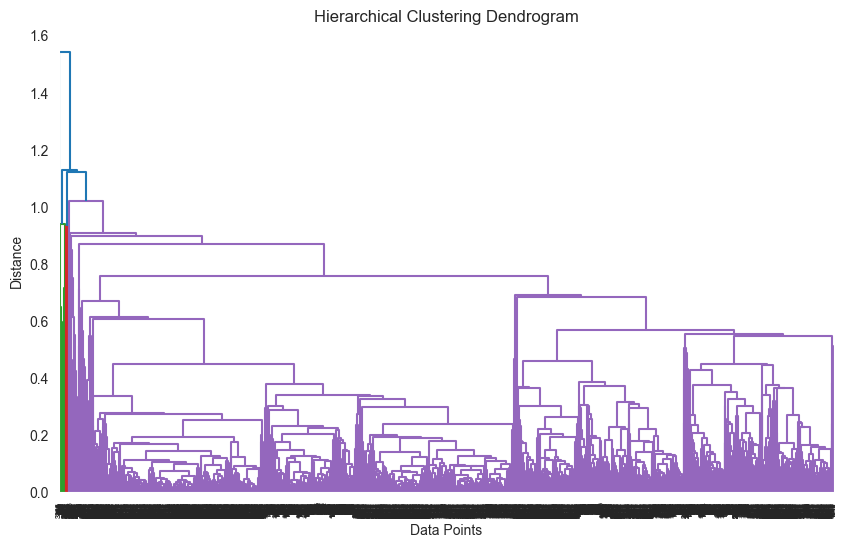

In [33]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(norm_df, method='average'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of centroid linkage

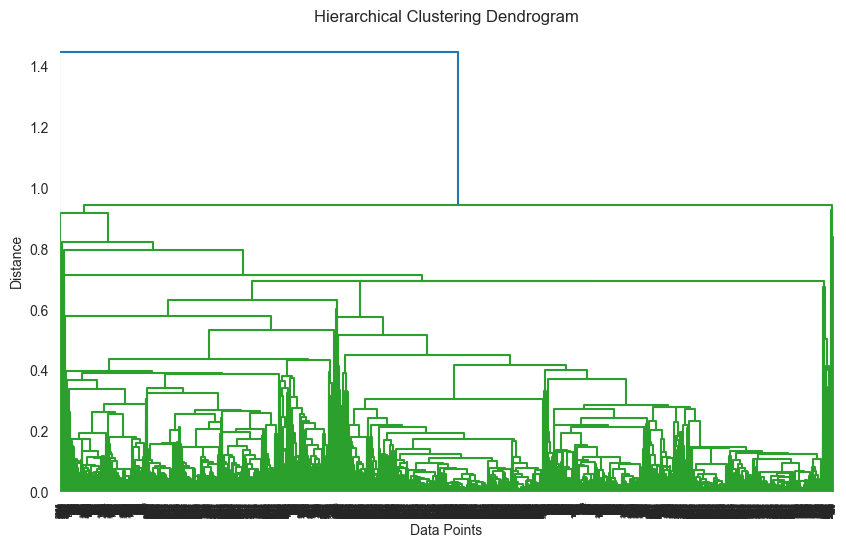

In [35]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(norm_df, method='centroid'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Dendrogram of ward linkage

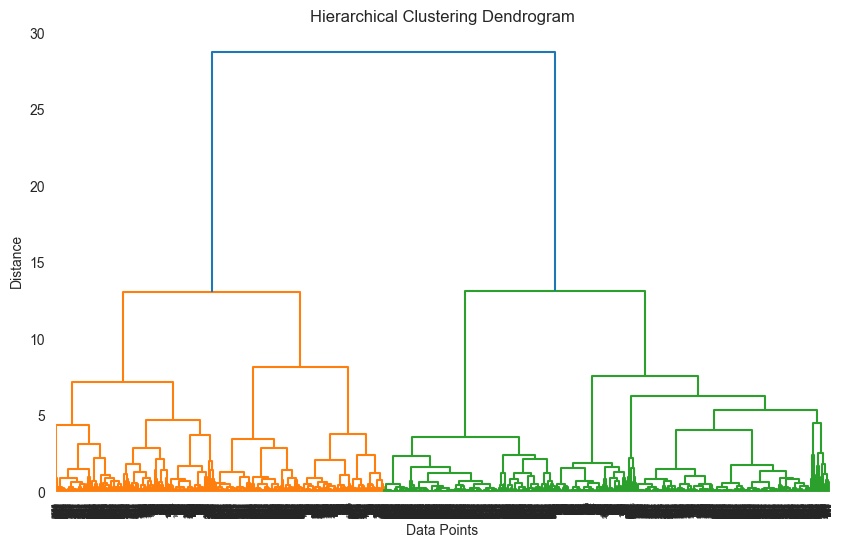

In [36]:
# create dendrogram

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(norm_df, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### From the dendrogram we can see different clustering.
### Single linkage - 3 clusters
### Complete linkage - 4 clusters
### Average linkage - 4 clusters
### Centroid linkage - 1 clusters
### Ward linkage - 3 clusters
### From the above clustering we can conclude that 4 is the optimum number of clustering as average linkage and complete linkage suggest the same.

In [43]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [45]:
# save clusters for chart
y_hc = hc.fit_predict(norm_df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [52]:
Clusters.head(5)

,Clusters
0,0
1,0
2,0
3,0
4,0


In [47]:
h_df = df_new.drop(['clusterid_new'], axis=1)

In [48]:
# Concatenate the original dataframe qaqnd cluster dataframe
heir_df = pd.concat([h_df, Clusters], axis=1)

In [49]:
heir_df.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,0.0


# DBSCAN Clustering

In [94]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'eps': np.arange(0.1, 2.1, 0.1),         # Range of epsilon values from 0.1 to 2.0
    'min_samples': np.arange(2, 100, 1)     # Range of min_samples values from 2 to 15
}


# Create a custom scoring function using silhouette score
def custom_silhouette_score(estimator, norm_df):
    labels = estimator.fit_predict(norm_df)
    score = silhouette_score(norm_df, labels) if len(np.unique(labels)) > 1 else -1
    return score

# Create a DBSCAN instance
dbscan = DBSCAN()

# Create a GridSearchCV instance with custom scoring
grid_search = GridSearchCV(dbscan, param_grid, cv=3, scoring=custom_silhouette_score)

# Perform the grid search
grid_search.fit(norm_df)

# Print the best hyperparameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)

Best Parameters: {'eps': 0.6, 'min_samples': 81}
Best Silhouette Score: 0.6159374968514219


In [95]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.6, min_samples = 81).fit(norm_df)
# Print the cluster labels
print(clustering.labels_)

[0 0 0 ... 0 0 0]


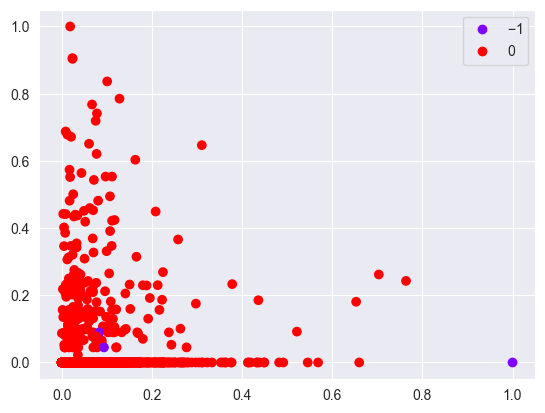

In [96]:
import matplotlib.pyplot as plt

# Plot the clusters
scatter = plt.scatter(norm_df[:, 0], norm_df[:, 1], c=clustering.labels_, cmap='rainbow')

# Add a legend
plt.legend(*scatter.legend_elements())


# Show the plot
plt.show()

In [97]:
cl=pd.DataFrame(clustering.labels_,columns=['cluster'])

In [98]:
dbscan_df = pd.concat([h_df,cl],axis=1)

In [99]:
dbscan_df.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,0.0


# From all these three clustering methods we can conclude that 4 is the optimum clustering value. 